In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
#tes.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\tesseract'
#tes.pytesseract.tessdata_dir_config = '--tessdata-dir "C:\Program Files\Tesseract-OCR\tessdata"'# your path may be different

In [2]:
img = cv2.imread('Data-Images/Cars/106.jpg')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [3]:
plate_cas = cv2.CascadeClassifier('indian_license_plate.xml')

In [4]:
def detect(img):
    plate_img = img.copy()
    
    plate_rect = np.array([])
    i=1
    while plate_rect.shape != (1,4):
        
        i+=1
        plate_rect = plate_cas.detectMultiScale(plate_img,scaleFactor=1.3,
                                               minNeighbors = i)
        plate_rect = np.array(plate_rect)
        if i==21:
            break
        print(plate_rect)

        
    #Corners of image
    
    p=plate_rect[0][0] 
    q=plate_rect[0][1]
    r=plate_rect[0][2]
    s=plate_rect[0][3]
    
    #x,y = bottom left
    #h,w = height , width

    for (x,y,w,h) in plate_rect:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,0,0),4)

    return plate_img[q:q+s,p:p+r,:]

In [5]:
result = detect(img)

[[210 203 114  29]]


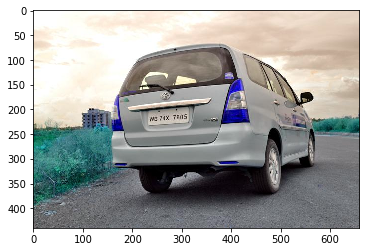

In [13]:
plt.imshow(img)

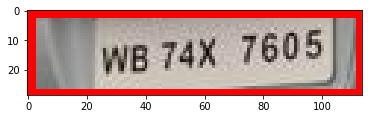

In [6]:
plt.imshow(result)

In [7]:
result.shape

(29, 114, 3)

In [8]:
gray_result = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)

In [9]:
_,th1 = cv2.threshold(gray_result, 200, 255, cv2.THRESH_BINARY)

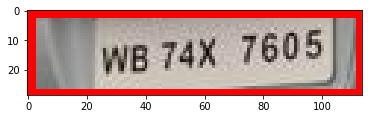

In [14]:
plt.imshow(result,cmap='gray')

In [15]:
#cv2.imwrite('Image_tests\plate_01.png',gray_result)
#cv2.imwrite('Image_tests\plate_02.png',th1)

#num1 = pytesseract.image_to_string(Image.open('Image_testsℎ'))
#num2 = pytesseract.image_to_string(Image.open('Image_tests\new-plate_1'))

num1 = pytesseract.image_to_string(gray_result
num2 = pytesseract.image_to_string(th1))

print(num1)
print(num2)

print(num1) if len(num1) > len(num2) else print(num2)

we 74x. 7605

we 74x. 7605


## 

In [12]:
print(pytesseract.image_to_string(th1))

In [ ]:
cv2.imwrite()